http://fourier.eng.hmc.edu/e176/lectures/ch7/node11.html                                                                    
https://towardsdatascience.com/bias-variance-and-regularization-in-linear-regression-lasso-ridge-and-elastic-net-8bf81991d0c5  
https://www.statlect.com/fundamentals-of-statistics/Gauss-Markov-theorem                                                    
https://www.investopedia.com/ask/answers/042415/what-difference-between-standard-error-means-and-standard-deviation.asp

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def polynomial_x(xx, p):
    x_powers = [xx**(p+1) for p in range(p)]
    x_concated = np.hstack((np.array(x_powers)))
#     print(x_concated.shape, xx.shape, p)
    return x_concated.reshape(xx.shape[0], xx.shape[1]*p)

In [3]:
def cent_normalize(*args):
#     return xx - xx.mean(0)
    for xx in args:
#         print(xx)
        yield xx - xx.mean(0)

In [4]:
def generate_data_of_degree(p=1, m=100, n=1):
    '''
    m - number of examples
    p - max power of polynomial
    n - features of x
    '''
#     x = np.sort((2 - 3 * np.random.normal(0, 1, (m,n))),axis=0)
    x = 2 - 3 * np.random.uniform(0, 1, (m,n))
    x_polyn = polynomial_x(x, p)
    W = np.random.normal(2, 10, (x_polyn.shape[1], 1))
    b = np.random.normal(-1, 1, (m, 1))
    
    y = b + x_polyn@W
    return y, x

In [5]:
# y_1, x_1 = cent_normalize(*generate_data_of_degree(p=1, m=300, n=1))
# y_2, x_2 = cent_normalize(*generate_data_of_degree(p=2, m=300, n=1))
# y_3, x_3 = cent_normalize(*generate_data_of_degree(p=3, m=300, n=1))
# y_5, x_5 = cent_normalize(*generate_data_of_degree(p=5, m=300, n=1))

y_1, x_1 = generate_data_of_degree(p=1, m=300, n=1)
y_2, x_2 = generate_data_of_degree(p=2, m=300, n=1)
y_3, x_3 = generate_data_of_degree(p=3, m=300, n=1)
y_5, x_5 = generate_data_of_degree(p=5, m=300, n=1)

In [6]:
def OLS(X, y):
    U,E,V_T = np.linalg.svd(X)
    sigmas_plus = np.zeros((X.shape[0], X.shape[1])).T
    sigmas_plus[:E.shape[0], :E.shape[0]] = np.linalg.inv(np.diag(E))
    return V_T.T@sigmas_plus@U.T@y

In [7]:
def regularized_OLS(X, y, lamda=0.1):
    return np.linalg.inv(X.T@X + lamda*np.eye(X.shape[1], X.shape[1]))@X.T@y

In [8]:
OLS(x_1, y_1), regularized_OLS(x_1, y_1, lamda=0)

(array([[5.60053761]]), array([[5.60053761]]))

In [9]:
# w_1 = OLS(x_1, y_1)
w_1_reg = regularized_OLS(x_1, y_1, lamda=0.2)
w_2_reg = regularized_OLS(x_2, y_2, lamda=0.2)
w_3_reg = regularized_OLS(x_3, y_3, lamda=0.2)
w_5_reg = regularized_OLS(x_5, y_5, lamda=0.2)

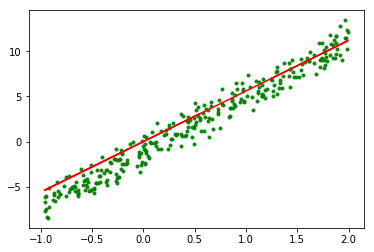

In [10]:
plt.scatter(x_1, y_1, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_1, x_1@w_1_reg, '-', color='red')
plt.show()

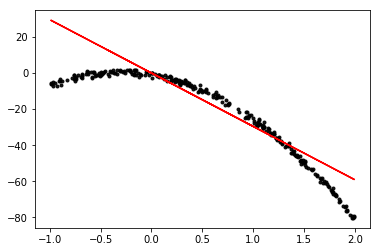

In [11]:
plt.scatter(x_2, y_2, s=None, marker='.', color='k', alpha=0.9)
plt.plot(x_2, x_2@w_2_reg, '-', color='red')
plt.show()

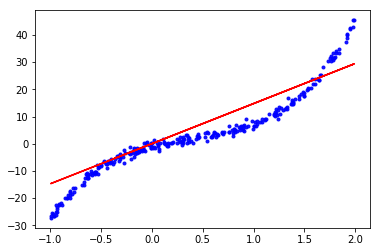

In [12]:
plt.scatter(x_3, y_3, s=None, marker='.', color='b', alpha=0.9)
plt.plot(x_3, x_3@w_3_reg, '-', color='red')
plt.show()

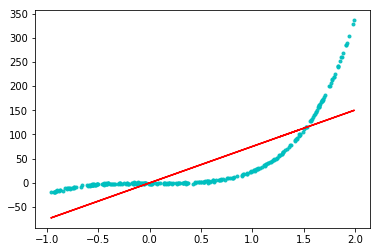

In [13]:
plt.scatter(x_5, y_5, s=None, marker='.', color='c', alpha=0.9)
plt.plot(x_5, x_5@w_5_reg, '-', color='red')
plt.show()

In [14]:
y_1_test, x_1_test = cent_normalize(*generate_data_of_degree(p=1, m=300, n=1))
y_2_test, x_2_test = cent_normalize(*generate_data_of_degree(p=2, m=300, n=1))
y_3_test, x_3_test = cent_normalize(*generate_data_of_degree(p=3, m=300, n=1))
y_5_test, x_5_test = cent_normalize(*generate_data_of_degree(p=5, m=300, n=1))

In [15]:
# plt.scatter(x_1_test, y_1_test, s=None, marker='.', color='g', alpha=0.9)

In [16]:
# plt.scatter(x_2_test, y_2_test, s=None, marker='.', color='k', alpha=0.9)

In [17]:
# plt.scatter(x_3_test, y_3_test, s=None, marker='.', color='b', alpha=0.9)

In [21]:
# plt.scatter(x_5_test, y_5_test, s=None, marker='.', color='c', alpha=0.9)

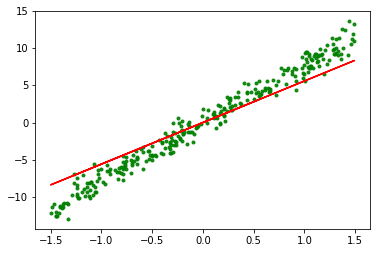

In [22]:
plt.scatter(x_1_test, y_1_test, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_1_test, x_1_test@w_1_reg, '-', color='red')
plt.show()

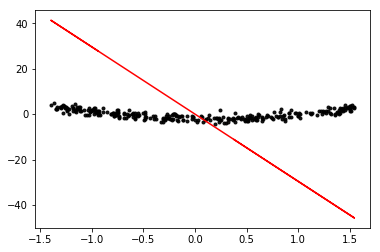

In [23]:
plt.scatter(x_2_test, y_2_test, s=None, marker='.', color='k', alpha=0.9)
plt.plot(x_2_test, x_2_test@w_2_reg, '-', color='red')
plt.show()

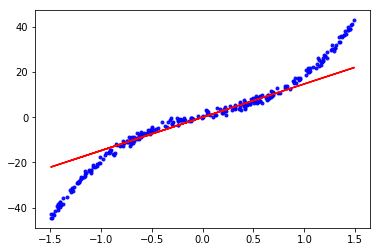

In [24]:
plt.scatter(x_3_test, y_3_test, s=None, marker='.', color='b', alpha=0.9)
plt.plot(x_3_test, x_3_test@w_3_reg, '-', color='red')
plt.show()

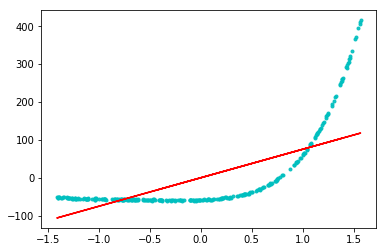

In [25]:
plt.scatter(x_5_test, y_5_test, s=None, marker='.', color='c', alpha=0.9)
plt.plot(x_5_test, x_5_test@w_5_reg, '-', color='red')
plt.show()

In [26]:
np.linalg.norm(y_1-x_1@w_1_reg), np.linalg.norm(y_2-x_2@w_2_reg), np.linalg.norm(y_3-x_3@w_3_reg), np.linalg.norm(y_5-x_5@w_5_reg)

(23.59811456758332, 205.1120642675751, 95.74539889784225, 791.4523135792567)

In [27]:
np.linalg.norm(y_1_test-x_1_test@w_1_reg), np.linalg.norm(y_2_test-x_2_test@w_2_reg), np.linalg.norm(y_3_test-x_3_test@w_3_reg), np.linalg.norm(y_5_test-x_5_test@w_5_reg)

(36.20816736502946, 452.6774628782387, 131.4008718895108, 1275.9527784491931)

Polynomial Regression

In [28]:
x_1_poly = polynomial_x(x_1, p=9)
x_1.shape, x_1_poly.shape

((300, 1), (300, 9))

In [29]:
w_1_poly_reg = regularized_OLS(x_1_poly, y_1, lamda=0.3)

In [30]:
# x_1_poly@w_1_poly_reg

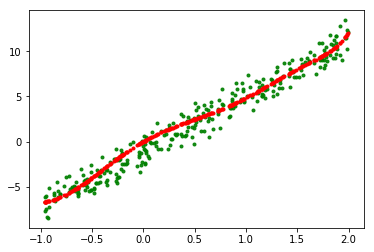

In [31]:
plt.scatter(x_1, y_1, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_1, x_1_poly@w_1_poly_reg, '.', color='red')
plt.show()

In [32]:
w_2_poly_reg = regularized_OLS(polynomial_x(x_2, 10), y_2, lamda=0.)

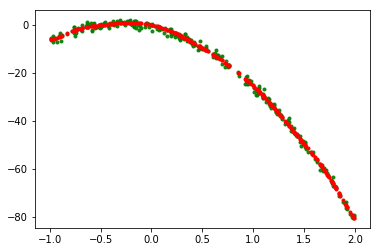

In [33]:
plt.scatter(x_2, y_2, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_2, polynomial_x(x_2, 10)@w_2_poly_reg, '.', color='red')
plt.show()

In [34]:
w_3_poly_reg = regularized_OLS(polynomial_x(x_3, 2), y_3, lamda=0.1)

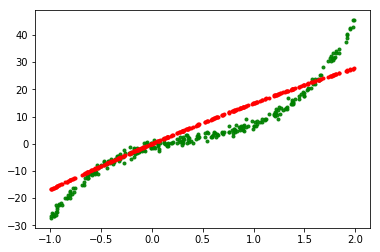

In [35]:
plt.scatter(x_3, y_3, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_3, polynomial_x(x_3, 2)@w_3_poly_reg, '.', color='red')
plt.show()

In [36]:
w_3_poly_reg = regularized_OLS(polynomial_x(x_3, 3), y_3, lamda=0.)

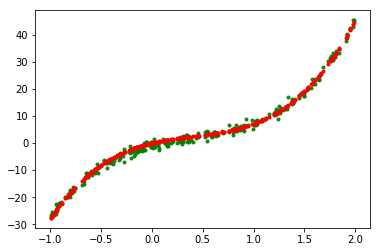

In [37]:
plt.scatter(x_3, y_3, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_3, polynomial_x(x_3, 3)@w_3_poly_reg, '.', color='red')
plt.show()

In [38]:
w_5_poly_reg = regularized_OLS(polynomial_x(x_5, 3), y_5, lamda=0.)

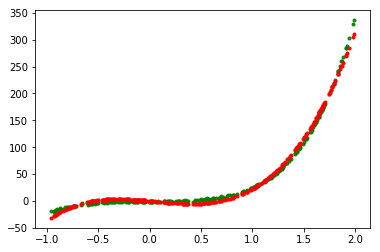

In [39]:
plt.scatter(x_5, y_5, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_5, polynomial_x(x_5, 3)@w_5_poly_reg, '.', color='red')
plt.show()

In [40]:
w_5_poly_reg = regularized_OLS(polynomial_x(x_5, 5), y_5, lamda=0.)

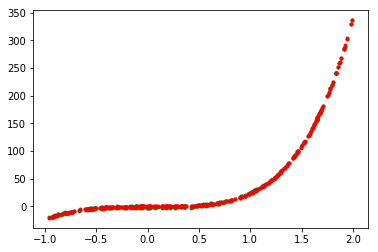

In [41]:
plt.scatter(x_5, y_5, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_5, polynomial_x(x_5, 5)@w_5_poly_reg, '.', color='red')
plt.show()

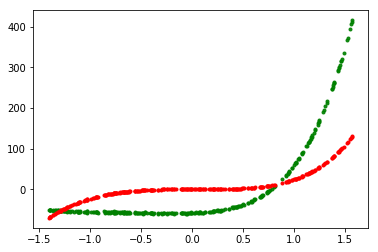

In [42]:
plt.scatter(x_5_test, y_5_test, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_5_test, polynomial_x(x_5_test, 5)@w_5_poly_reg, '.', color='red')
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [44]:
p = PolynomialFeatures(degree=5)
p.fit(x_5)

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [45]:
# xx = p.transform(x_1)

In [46]:
l = LinearRegression()
l.fit(x_5, y_5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

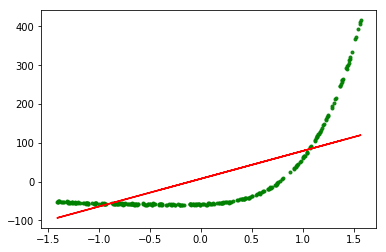

In [47]:
plt.scatter(x_5_test, y_5_test, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_5_test, l.predict(x_5_test), '-', color='red')
plt.show()

In [48]:
l = LinearRegression()
l.fit(polynomial_x(x_5, p= 5), y_5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

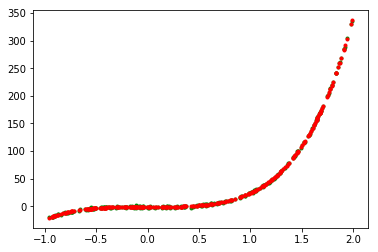

In [49]:
plt.scatter(x_5, y_5, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_5, l.predict(polynomial_x(x_5, p= 5)), '.', color='red')
plt.show()

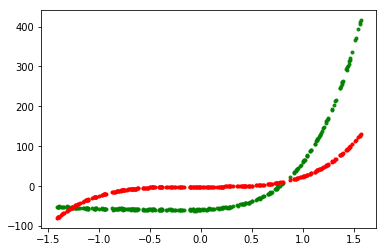

In [50]:
plt.scatter(x_5_test, y_5_test, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_5_test, l.predict(polynomial_x(x_5_test, p= 5)), '.', color='red')
plt.show()

In [51]:
l = LinearRegression()
l.fit(p.transform(x_5), y_5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

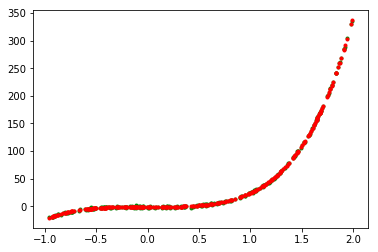

In [52]:
plt.scatter(x_5, y_5, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_5, l.predict(p.transform(x_5)), '.', color='red')
plt.show()

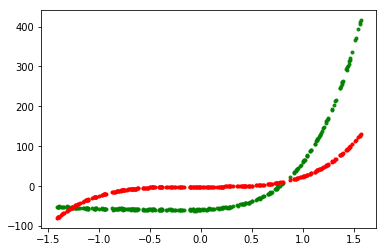

In [53]:
plt.scatter(x_5_test, y_5_test, s=None, marker='.', color='g', alpha=0.9)
plt.plot(x_5_test, l.predict(p.transform(x_5_test)), '.', color='red')
plt.show()